In [9]:
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#ml models 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [10]:
cancer = pd.read_csv("S:\\Breast Cancer Prediction With Machine learning In Python\\final.csv")

In [11]:
cancer.head(3)

,SUBJECTID,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
0,1001,38.73,Yes,Yes,No,Yes,No,No,88,78,30,14,No,1264,751,1,No,2
1,1002,37.79,Yes,Yes,Yes,Yes,No,Yes,29,26,66,16,No,1155,1043,1,No,3
2,1003,49.83,Yes,Yes,Yes,Yes,No,No,50,64,54,46,Yes,2387,2387,0,No,3


In [12]:
cancer.shape

(168, 18)

In [13]:
final = pd.read_csv("S:\\Breast Cancer Prediction With Machine learning In Python\\final.csv")

In [14]:
final.head(4)

,SUBJECTID,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
0,1001,38.73,Yes,Yes,No,Yes,No,No,88,78,30,14,No,1264,751,1,No,2
1,1002,37.79,Yes,Yes,Yes,Yes,No,Yes,29,26,66,16,No,1155,1043,1,No,3
2,1003,49.83,Yes,Yes,Yes,Yes,No,No,50,64,54,46,Yes,2387,2387,0,No,3
3,1008,64.51,Yes,Yes,Yes,Yes,Yes,Yes,45,49,47,32,Yes,2341,2341,0,No,1


In [15]:
final.shape

(168, 18)

In [16]:
final.isnull().sum()

SUBJECTID          0
age                0
White              0
ER+                0
PR+                0
HR+                0
Bilateral          0
Right_Breast       0
MRI_LD_Baseline    0
MRI_LD_1_3dAC      0
MRI_LD_Int_Reg     0
MRI_LD_PreSurg     0
Alive              0
Survival_length    0
RFS                0
RFS_code           0
PCR                0
RCB                0
dtype: int64

In [17]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SUBJECTID        168 non-null    int64  
 1   age              168 non-null    float64
 2   White            168 non-null    object 
 3   ER+              168 non-null    object 
 4   PR+              168 non-null    object 
 5   HR+              168 non-null    object 
 6   Bilateral        168 non-null    object 
 7   Right_Breast     168 non-null    object 
 8   MRI_LD_Baseline  168 non-null    int64  
 9   MRI_LD_1_3dAC    168 non-null    int64  
 10  MRI_LD_Int_Reg   168 non-null    int64  
 11  MRI_LD_PreSurg   168 non-null    int64  
 12  Alive            168 non-null    object 
 13  Survival_length  168 non-null    int64  
 14  RFS              168 non-null    int64  
 15  RFS_code         168 non-null    int64  
 16  PCR              168 non-null    object 
 17  RCB             

In [18]:
final['age'] = final['age'].astype(int)

In [19]:
final['age'].head(4)

0    38
1    37
2    49
3    64
Name: age, dtype: int32

In [20]:
final.dtypes

SUBJECTID           int64
age                 int32
White              object
ER+                object
PR+                object
HR+                object
Bilateral          object
Right_Breast       object
MRI_LD_Baseline     int64
MRI_LD_1_3dAC       int64
MRI_LD_Int_Reg      int64
MRI_LD_PreSurg      int64
Alive              object
Survival_length     int64
RFS                 int64
RFS_code            int64
PCR                object
RCB                 int64
dtype: object

In [21]:
final.columns

Index(['SUBJECTID', 'age', 'White', 'ER+', 'PR+', 'HR+', 'Bilateral',
       'Right_Breast', 'MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg',
       'MRI_LD_PreSurg', 'Alive', 'Survival_length', 'RFS', 'RFS_code', 'PCR',
       'RCB'],
      dtype='object')

In [22]:
correlation = final[['MRI_LD_Baseline','MRI_LD_1_3dAC','MRI_LD_PreSurg','MRI_LD_Int_Reg']]

In [23]:
correlation.corr()

,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_PreSurg,MRI_LD_Int_Reg
MRI_LD_Baseline,1.000000,0.887824,0.409114,0.661451
MRI_LD_1_3dAC,0.887824,1.000000,0.430098,0.671538
MRI_LD_PreSurg,0.409114,0.430098,1.000000,0.675212
MRI_LD_Int_Reg,0.661451,0.671538,0.675212,1.000000


<Axes: >

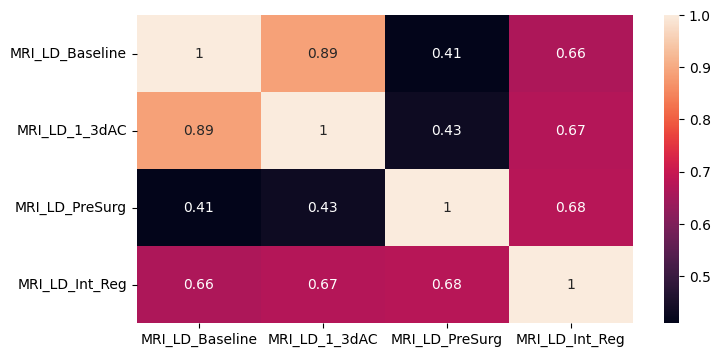

In [24]:
plt.figure(figsize=(8, 4))
sns.heatmap(correlation.corr(), annot=True)

In [25]:
#DUMMY ENCODING

In [26]:
dummy_final = final[['ER+','PR+','HR+']]

In [27]:
dummy_final.head(6)

,ER+,PR+,HR+
0,Yes,No,Yes
1,Yes,Yes,Yes
2,Yes,Yes,Yes
3,Yes,Yes,Yes
4,No,No,No
5,No,No,No


In [28]:
dummy_final  = dummy_final.replace(('Yes', 'No'),(1, 0))

C:\Users\kanha\AppData\Local\Temp\ipykernel_8380\3266285011.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_final  = dummy_final.replace(('Yes', 'No'),(1, 0))


In [29]:
print(dummy_final.shape)
dummy_final.head(2)

(168, 3)


,ER+,PR+,HR+
0,1,0,1
1,1,1,1


<Axes: >

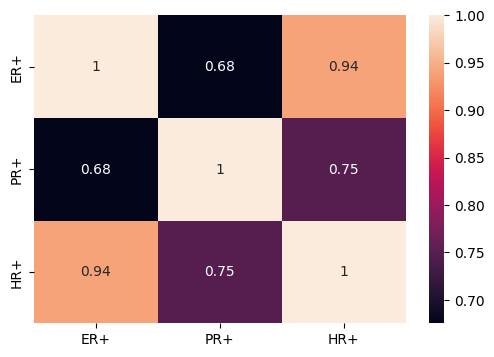

In [30]:
plt.figure(figsize=(6, 4))
sns.heatmap(dummy_final.corr(), annot=True)

In [31]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Histogram(x=final['Alive'], y=final['age']),
    row=1, col=1
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'histogram',
              'x': array(['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
                          'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
                          'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                          'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
                          'Yes', 'Yes', 'No', 'Yes', 'Yes'], dtype=object),
              'xaxis': 'x',
              'y': array([38, 37, 49, 64, 40, 41, 40, 53, 49, 42, 35, 52, 48, 51, 44, 63, 52, 59,
                          46, 51, 37, 30, 46, 58, 38, 49, 26, 52, 50, 63, 42, 52, 35, 44, 54, 67,
                          54, 34, 52, 55, 57, 57, 36, 38, 49, 36, 33, 41, 31, 46, 51, 34, 43, 41,
                          53, 60, 51, 54, 44, 43, 42, 44, 62, 50, 63, 42, 57, 50, 50, 58, 52, 56,
                          50, 46, 53, 44, 51, 34, 49, 39, 41, 59, 61, 47, 44, 33, 52, 39, 51, 43,
                          58, 60, 29, 35, 46, 49, 28, 56, 50, 59, 50, 59, 51, 50, 51, 65, 42, 65,
                          41, 61, 56, 56, 38, 60, 39, 54, 44, 44, 44, 50, 44, 49, 64, 40, 49, 31,
                          34, 53, 49, 47, 38, 68, 45, 59, 33, 35, 44, 59, 37, 43, 50, 53, 39, 43,
                          36, 43, 40, 48, 47, 34, 47, 43, 52, 55, 59, 61, 47, 42, 53, 50, 53, 49,
                          27, 38, 64, 38, 46, 48]),
              'yaxis': 'y'}],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45]},
               'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 1.0]}}
})

In [32]:
136+32

168

In [33]:
final.head(5)

,SUBJECTID,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
0,1001,38,Yes,Yes,No,Yes,No,No,88,78,30,14,No,1264,751,1,No,2
1,1002,37,Yes,Yes,Yes,Yes,No,Yes,29,26,66,16,No,1155,1043,1,No,3
2,1003,49,Yes,Yes,Yes,Yes,No,No,50,64,54,46,Yes,2387,2387,0,No,3
3,1008,64,Yes,Yes,Yes,Yes,Yes,Yes,45,49,47,32,Yes,2341,2341,0,No,1
4,1009,40,No,No,No,No,No,No,75,66,57,7,Yes,2355,2355,0,No,2


In [34]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(x=final['Alive'], y=final['Survival_length'],fillcolor='violet',),
    row=1, col=1
)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'fillcolor': 'violet',
              'type': 'box',
              'x': array(['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
                          'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
                          'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                          'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
                          'Yes', 'Yes', 'No', 'Yes', 'Yes'], dtype=object),
              'xaxis': 'x',
              'y': array([1264, 1155, 2387, 2341, 2355, 2151, 2340, 2425, 2383, 2039, 2359, 2200,
                          2059, 1924, 2158, 2023, 2209, 1942,  555, 1806, 1843, 2030, 1679, 1928,
                           745,  536, 1799, 1907,  344,  663,  615, 1738,  210,  314, 1655, 1622,
                           658,  869, 1862, 1273, 1670, 1947, 1596, 1720, 1725, 1981, 1891, 1926,
                          1939, 1812, 1560, 1766, 1895, 1643, 1967, 1485, 1646, 1384, 1784, 1802,
                          1125, 1785, 1395, 1769, 1906,  944,  317, 1886, 1176, 1420, 1349, 1652,
                          1808, 1510, 1432, 1466, 1802, 1427, 1834, 1516, 1498, 1481, 1415, 1567,
                          1615, 1684,  612, 1375, 1719, 1599, 1596,  491, 1708, 1329, 1679, 1662,
                          1011, 1261,  283, 1568, 1646, 1534, 1617, 1544, 1287, 1190, 1615,  704,
                          1521, 1581, 1190, 1470, 1280, 1624, 1330, 1224,  345,  756, 1190, 1564,
                           326,  494, 1344, 1518, 1456, 1293, 1357, 1456, 1322, 1454, 1318, 1314,
                          1238, 1425,  810, 1000, 1050, 1126,  476, 1325, 1507, 1441, 1307,  481,
                          1357,  970, 1256, 1159, 1335, 1302, 1379, 1227, 1280, 1148, 1303, 1048,
                          1115, 1272, 1251, 1117,  187, 1197, 1076,  694, 1026,  832, 1031, 1155],
                         dtype=int64),
              'yaxis': 'y'}],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45]},
               'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 1.0]}}
})

In [35]:
outlier= final[(final['Survival_length'] > 400)]


In [36]:
outlier.shape

(160, 18)

In [37]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Histogram(x=outlier['Alive'], y=outlier['Survival_length']),
    row=1, col=1
)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'histogram',
              'x': array(['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                          'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
                          'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
                          'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
                          'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
                          'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
                          'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([1264, 1155, 2387, 2341, 2355, 2151, 2340, 2425, 2383, 2039, 2359, 2200,
                          2059, 1924, 2158, 2023, 2209, 1942,  555, 1806, 1843, 2030, 1679, 1928,
                           745,  536, 1799, 1907,  663,  615, 1738, 1655, 1622,  658,  869, 1862,
                          1273, 1670, 1947, 1596, 1720, 1725, 1981, 1891, 1926, 1939, 1812, 1560,
                          1766, 1895, 1643, 1967, 1485, 1646, 1384, 1784, 1802, 1125, 1785, 1395,
                          1769, 1906,  944, 1886, 1176, 1420, 1349, 1652, 1808, 1510, 1432, 1466,
                          1802, 1427, 1834, 1516, 1498, 1481, 1415, 1567, 1615, 1684,  612, 1375,
                          1719, 1599, 1596,  491, 1708, 1329, 1679, 1662, 1011, 1261, 1568, 1646,
                          1534, 1617, 1544, 1287, 1190, 1615,  704, 1521, 1581, 1190, 1470, 1280,
                          1624, 1330, 1224,  756, 1190, 1564,  494, 1344, 1518, 1456, 1293, 1357,
                          1456, 1322, 1454, 1318, 1314, 1238, 1425,  810, 1000, 1050, 1126,  476,
                          1325, 1507, 1441, 1307,  481, 1357,  970, 1256, 1159, 1335, 1302, 1379,
                          1227, 1280, 1148, 1303, 1048, 1115, 1272, 1251, 1117, 1197, 1076,  694,
                          1026,  832, 1031, 1155], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.45]},
               'xaxis2': {'anchor': 'y2', 'domain': [0.55, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x2', 'domain': [0.0, 1.0]}}
})

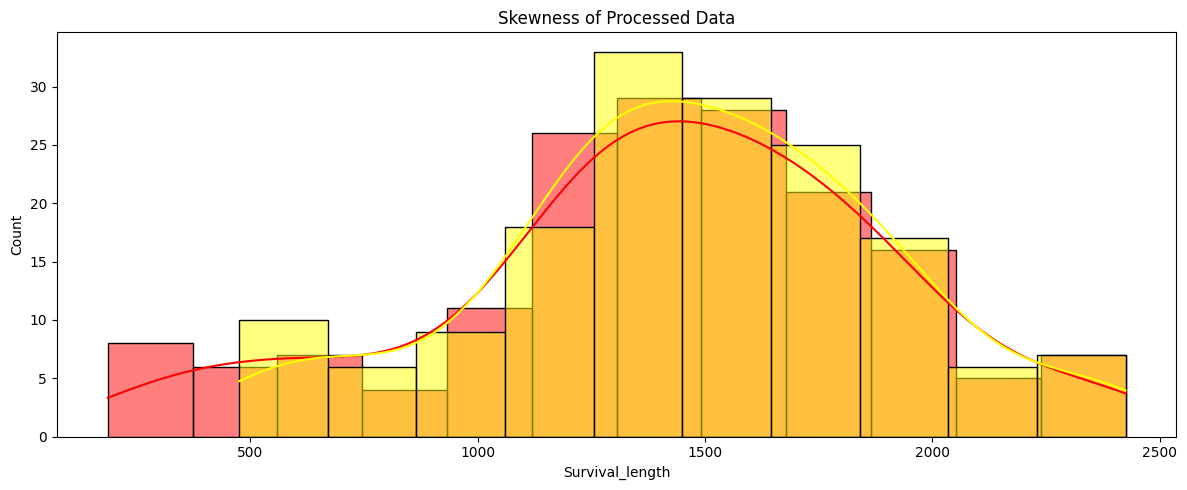

In [38]:
plt.figure(figsize=(12, 5))

sns.histplot(final['Survival_length'], kde=True, color='red')
plt.title('Skewness of Previous Data')

sns.histplot(outlier['Survival_length'], kde=True, color='yellow')
plt.title('Skewness of Processed Data')

plt.tight_layout()

plt.show()

In [39]:
final.shape

(168, 18)

In [40]:
outlier.shape

(160, 18)

In [41]:
outlier.columns

Index(['SUBJECTID', 'age', 'White', 'ER+', 'PR+', 'HR+', 'Bilateral',
       'Right_Breast', 'MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg',
       'MRI_LD_PreSurg', 'Alive', 'Survival_length', 'RFS', 'RFS_code', 'PCR',
       'RCB'],
      dtype='object')

In [42]:
pp= outlier[['Survival_length','RFS']]

In [43]:
pp.shape

(160, 2)

In [44]:
pp.corr()

,Survival_length,RFS
Survival_length,1.000000,0.881126
RFS,0.881126,1.000000


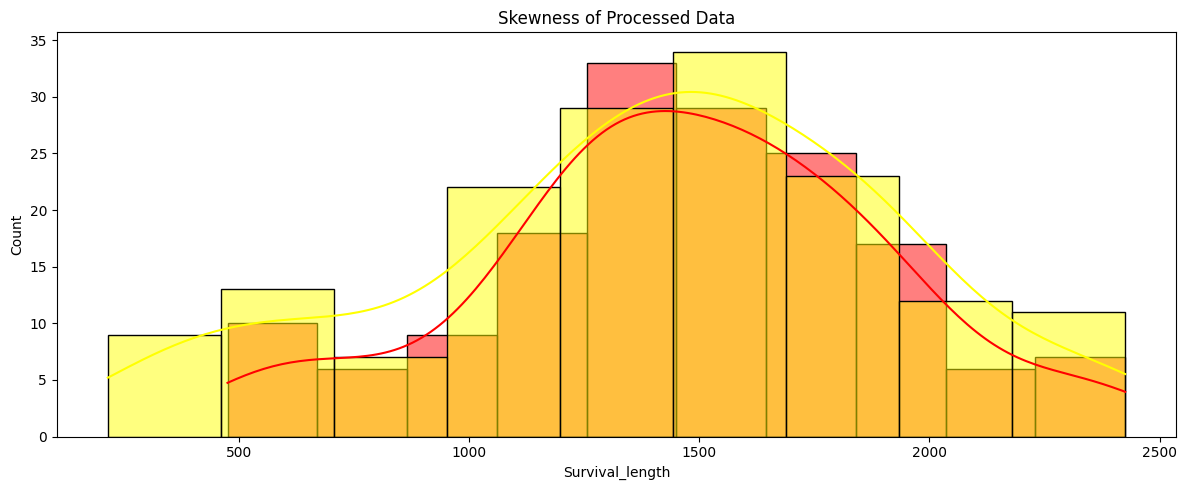

In [45]:
plt.figure(figsize=(12, 5))

sns.histplot(pp['Survival_length'], kde=True, color='red')
plt.title('Skewness of Previous Data')

sns.histplot(pp['RFS'], kde=True, color='yellow')
plt.title('Skewness of Processed Data')

plt.tight_layout()

plt.show()

In [46]:
outlier.shape

(160, 18)

In [47]:
outlier.columns

Index(['SUBJECTID', 'age', 'White', 'ER+', 'PR+', 'HR+', 'Bilateral',
       'Right_Breast', 'MRI_LD_Baseline', 'MRI_LD_1_3dAC', 'MRI_LD_Int_Reg',
       'MRI_LD_PreSurg', 'Alive', 'Survival_length', 'RFS', 'RFS_code', 'PCR',
       'RCB'],
      dtype='object')

<Axes: >

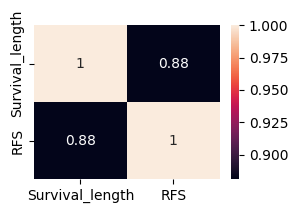

In [48]:
plt.figure(figsize=(3,2))
sns.heatmap(pp.corr(),annot=True)

In [49]:
pp.head(2)

,Survival_length,RFS
0,1264,751
1,1155,1043


In [50]:
outlier.head(2)

,SUBJECTID,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
0,1001,38,Yes,Yes,No,Yes,No,No,88,78,30,14,No,1264,751,1,No,2
1,1002,37,Yes,Yes,Yes,Yes,No,Yes,29,26,66,16,No,1155,1043,1,No,3


In [51]:
final.head(2)

,SUBJECTID,age,White,ER+,PR+,HR+,Bilateral,Right_Breast,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,RFS,RFS_code,PCR,RCB
0,1001,38,Yes,Yes,No,Yes,No,No,88,78,30,14,No,1264,751,1,No,2
1,1002,37,Yes,Yes,Yes,Yes,No,Yes,29,26,66,16,No,1155,1043,1,No,3


In [52]:
dummy_final.head(2)

,ER+,PR+,HR+
0,1,0,1
1,1,1,1


In [53]:
fin_col = outlier[['age','MRI_LD_Baseline','MRI_LD_1_3dAC','MRI_LD_Int_Reg','MRI_LD_PreSurg','Alive','Survival_length']]

In [54]:
fin_col.head(4)

,age,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length
0,38,88,78,30,14,No,1264
1,37,29,26,66,16,No,1155
2,49,50,64,54,46,Yes,2387
3,64,45,49,47,32,Yes,2341


In [55]:
end_operation = pd.concat([fin_col,dummy_final], axis=1, join="inner")

In [56]:
end_operation.head(2)

,age,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,ER+,PR+,HR+
0,38,88,78,30,14,No,1264,1,0,1
1,37,29,26,66,16,No,1155,1,1,1


In [57]:
end_operation.shape

(160, 10)

In [58]:
#ML IMPLEMENTATION

In [59]:
end_operation.head(4)

,age,MRI_LD_Baseline,MRI_LD_1_3dAC,MRI_LD_Int_Reg,MRI_LD_PreSurg,Alive,Survival_length,ER+,PR+,HR+
0,38,88,78,30,14,No,1264,1,0,1
1,37,29,26,66,16,No,1155,1,1,1
2,49,50,64,54,46,Yes,2387,1,1,1
3,64,45,49,47,32,Yes,2341,1,1,1


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'data' with the columns 'Alive', 'Survival length', and 'Age'

# Load your dataset into a pandas DataFrame
# Example:
# data = pd.read_csv('your_dataset.csv')

# Prepare the data
X = end_operation[['Survival_length', 'age']]  # Predictor variables
y = end_operation['Alive']  # Outcome variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
logistic_reg = LogisticRegression()

# Fit the model with the training data
logistic_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_reg.predict(X_test)

# Evaluate the model
accuracy = logistic_reg.score(X_test, y_test)
print(f"Accuracy of the logistic regression model: {accuracy}")


Accuracy of the logistic regression model: 1.0


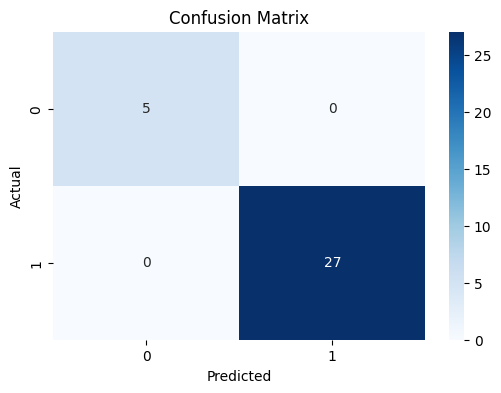

Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00        27

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

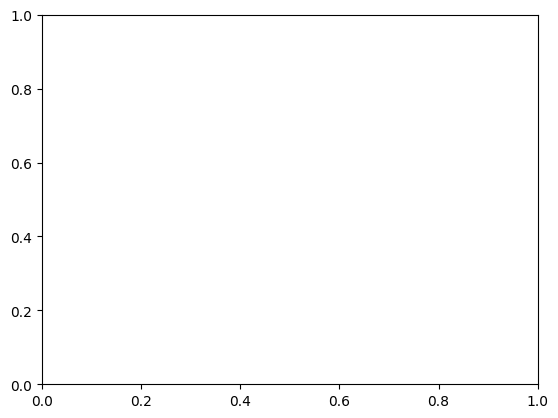

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Visualizing the decision boundary (for two features only)
if X.shape[1] == 2:
    h = .02  # step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logistic_reg.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test, palette='viridis')
    plt.title("Decision Boundary")
    plt.xlabel('Survival length')
    plt.ylabel('Age')
    plt.show()
else:
    print("Visualization of decision boundary is available for datasets with exactly 2 features.")



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

# Split the data into features and target variable
X = end_operation.drop('Alive', axis=1)  # Features: Survival length and Age
y = end_operation['Alive']  # Target variable: Alive

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Display the decision tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)


Accuracy: 0.9375
Decision Tree Rules:
 |--- Survival_length <= 1018.50
|   |--- MRI_LD_1_3dAC <= 29.00
|   |   |--- class: Yes
|   |--- MRI_LD_1_3dAC >  29.00
|   |   |--- class: No
|--- Survival_length >  1018.50
|   |--- Survival_length <= 1407.50
|   |   |--- Survival_length <= 1381.50
|   |   |   |--- Survival_length <= 1268.00
|   |   |   |   |--- age <= 42.50
|   |   |   |   |   |--- MRI_LD_PreSurg <= 12.00
|   |   |   |   |   |   |--- HR+ <= 0.50
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- HR+ >  0.50
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |--- MRI_LD_PreSurg >  12.00
|   |   |   |   |   |   |--- class: No
|   |   |   |   |--- age >  42.50
|   |   |   |   |   |--- MRI_LD_PreSurg <= 39.00
|   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |--- MRI_LD_PreSurg >  39.00
|   |   |   |   |   |   |--- age <= 47.00
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- age >  47.00
|   |   |   |   |   |   | 

Accuracy: 0.96875


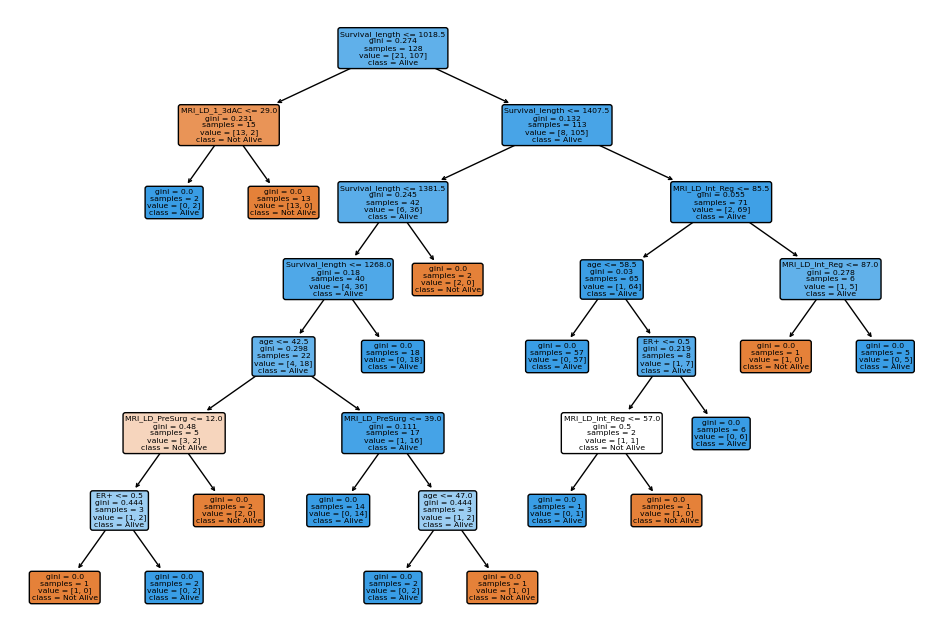

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the data into features and target variable
X = end_operation.drop('Alive', axis=1)  # Features: Survival length and Age
y = end_operation['Alive']  # Target variable: Alive

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Alive', 'Alive'], filled=True, rounded=True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



# Define the target variable and predictor variables
#target_variable = 'Alive'
#predictor_variables = ['Survival length', 'age', 'ER+', 'PR+', 'HR+']

# Split the data into predictors and target
X = end_operation[['Survival_length', 'age', 'ER+', 'PR+', 'HR+']]
y = end_operation['Alive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but often recommended for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
logistic_reg = LogisticRegression()

# Fit the model on the training data
logistic_reg.fit(X_train, y_train)

# Predict using the test set
predictions = logistic_reg.predict(X_test)

# Evaluate the model (you can use various metrics to evaluate the model's performance)
accuracy = logistic_reg.score(X_test, y_test)
print(f"Accuracy of the logistic regression model: {accuracy}")


Accuracy of the logistic regression model: 1.0


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming 'data' is your DataFrame containing the dataset
# Split data into features (X) and the target variable (y)
X = end_operation[['Survival_length', 'age', 'ER+', 'PR+', 'HR+']]
y = end_operation['Alive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for k-NN algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize k-NN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model with the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of k-NN model: {accuracy}")


Accuracy of k-NN model: 0.96875


M:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



M:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

M:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

M:\New folder\lib\site-p

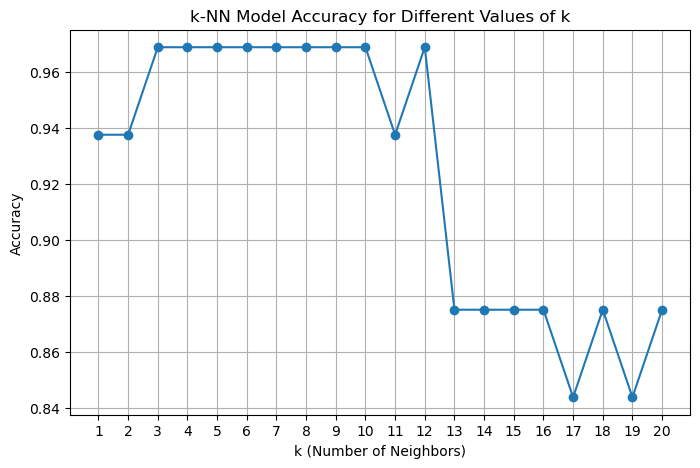

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset
# Split data into features (X) and the target variable (y)
X = end_operation[['Survival_length', 'age', 'ER+', 'PR+', 'HR+']]
y = end_operation['Alive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for k-NN algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try different values of k
k_values = list(range(1, 21))  # Trying k from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracy for different k values
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('k-NN Model Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


M:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

M:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

M:\New folder\lib\site-p

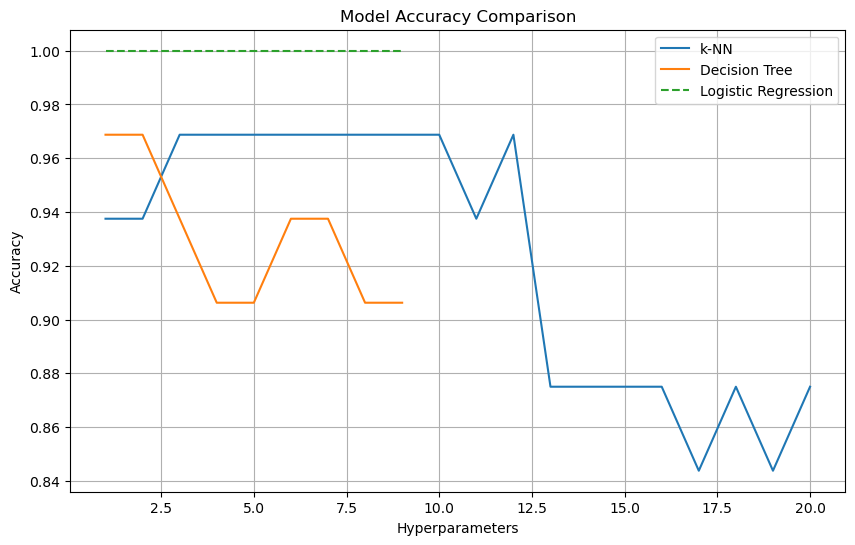

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Lists to store accuracies for each model
knn_accuracies = []
decision_tree_accuracies = []
logistic_accuracies = []

# Splitting the data
X = end_operation[['Survival_length', 'age', 'ER+', 'PR+', 'HR+']]
y = end_operation['Alive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trying different values of k for k-NN
k_values = list(range(1, 21))

# Training k-NN models for different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)

# Training Decision Tree models with different maximum depths
depths = list(range(1, 10))

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    decision_tree_accuracies.append(accuracy)

# Training Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred)
logistic_accuracies = [logistic_accuracy] * len(depths)  # Same accuracy for all depths

# Plotting the accuracy comparison for the three models
plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_accuracies, label='k-NN')
plt.plot(depths, decision_tree_accuracies, label='Decision Tree')
plt.plot(depths, logistic_accuracies, label='Logistic Regression', linestyle='--')

plt.title('Model Accuracy Comparison')
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


M:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



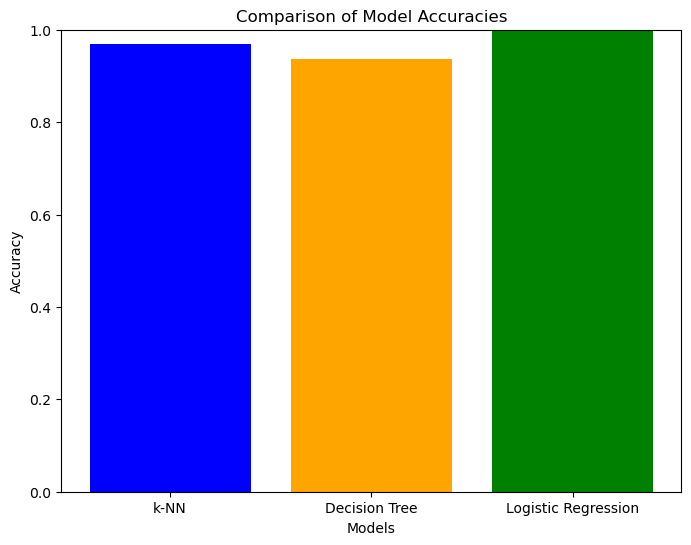

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming 'data' is your DataFrame containing the dataset
# Split data into features (X) and the target variable (y)
X = end_operation[['Survival_length', 'age', 'ER+', 'PR+', 'HR+']]
y = end_operation['Alive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for k-NN and logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
knn = KNeighborsClassifier(n_neighbors=5)
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

models = [knn, decision_tree, logistic_regression]
model_names = ['k-NN', 'Decision Tree', 'Logistic Regression']

# Store accuracies of different models
accuracies = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting histogram of accuracies
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'orange', 'green'])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


M:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



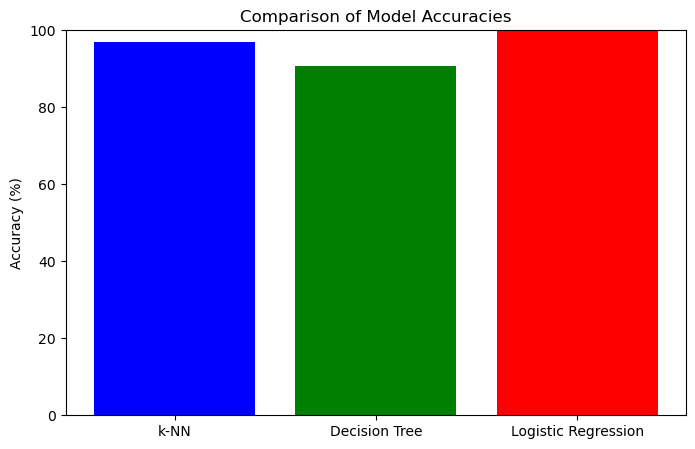

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming 'data' is your DataFrame containing the dataset
# Split data into features (X) and the target variable (y)
X = end_operation[['Survival_length', 'age', 'ER+', 'PR+', 'HR+']]
y = end_operation['Alive']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for k-NN and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize k-NN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_accuracy = knn.score(X_test, y_test) * 100

# Initialize Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dt_accuracy = decision_tree.score(X_test, y_test) * 100

# Initialize Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
log_reg_accuracy = logistic_regression.score(X_test, y_test) * 100

# Create a histogram
models = ['k-NN', 'Decision Tree', 'Logistic Regression']
accuracies = [knn_accuracy, dt_accuracy, log_reg_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100 for percentage
plt.show()
